## Initializing session

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})


cosmology = {
                   # LambdaCDM parameters
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
}


import os 
path_to_class_sz = os.environ['PATH_TO_CLASS_SZ_DATA']

## Galaxy kernels

1.0000000000000002


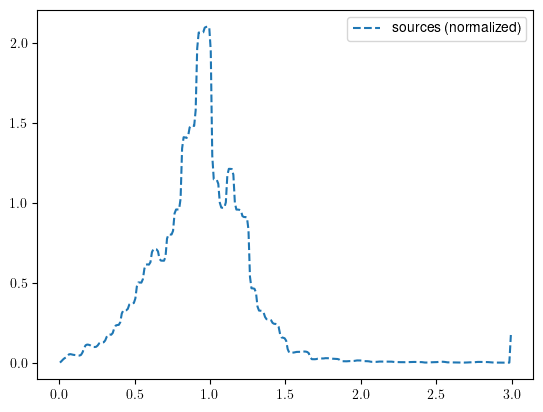

In [4]:
# z , nz_lenses = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_lens_bin1.txt',unpack=True)
# plt.plot(z,nz_lenses,label='lenses')
# print(np.trapz(nz_lenses,z)) ## lenses are not used here. 

z , nz_sources = np.loadtxt(path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_source_normalized_bin4.txt',unpack=True)
plt.plot(z,nz_sources,label='sources (normalized)',ls='--')

print(np.trapz(nz_sources,z))
plt.legend()

## Compute

In [5]:
%%time

M = Class()
M.set(cosmology)
M.set({
'output':'tSZ_gallens_1h,tSZ_gallens_2h',
# 'output':'tSZ_gallens_1h,gallens_lens_2h',
'ell_max' : 5e3,
'ell_min' : 2,
    
'dlogell':0.1,
# 'dell':5,
    

'ndim_redshifts':80,
'z_min':1e-5, 
'z_max': 2.,
# 'redshift_epsrel': 0.5e-3,
# 'redshift_epsabs': 1e-40,

'mass_function':'T08M200c',


'M_min':1e11, # Msun/h
'M_max':1e15, # Msun/h
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001,

    


# 'delta_for_galaxies':'200c', # not relevant for galaxy shear  
'delta_for_matter_density':'200c', # relevant for lensing 
# 'delta_for_electron_pressure':'500c', # relevant for tsz

    
'concentration_parameter':'fixed',
    

'Delta_z_source':0.00,
    
'galaxy_sample' : 'custom',
'full_path_to_source_dndz_gal' : path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_source_normalized_bin4.txt', # source galaxies

'N_samp_fftw':1024, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-8,
'l_max_samp_fftw' : 1e8,





'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s
'n_m_pressure_profile' :10, # default: 100, decrease for faster
'n_z_pressure_profile' :10, # default: 100, decrease for faster
'use_fft_for_profiles_transform' : 1, # use fft's or not. 
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e6,
     



'pressure_profile':'GNFW', # can be Battaglia, Arnaud, etc
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
"cosmo_model": 0, # lcdm emulators
    

'hm_consistency' : 1,

})
M.compute_class_szfast()

CPU times: user 12.5 s, sys: 6.15 s, total: 18.6 s
Wall time: 2.62 s


In [6]:
ell =  np.asarray(M.cl_ykg()['ell'])
cl1h = M.cl_ykg()['1h']
cl2h = M.cl_ykg()['2h']

In [7]:
# cl1h

## Plot

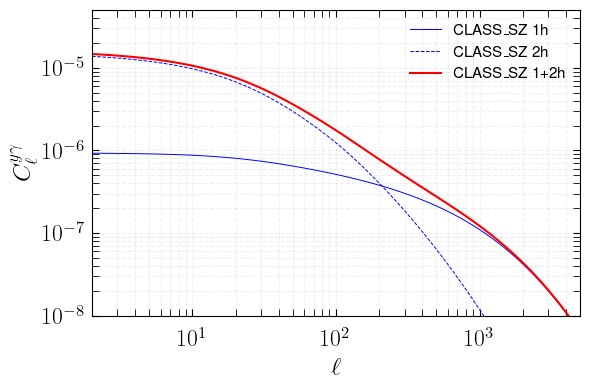

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(6,4))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{y\gamma}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-8,5e-5)
ax.set_xlim(2.,5e3)
fac = ell*(ell+1.)/2./np.pi
ax.plot(ell,cl1h/fac,label='CLASS_SZ 1h',c='b',ls='-',lw=0.7)
ax.plot(ell,cl2h/fac,label='CLASS_SZ 2h',c='b',ls='--',lw=0.7)
ax.plot(ell,cl1h/fac+cl2h/fac,label='CLASS_SZ 1+2h',c='r')


ax.legend(loc=1,ncol = 1,frameon=False,fontsize=11)

fig.tight_layout()

## Different pressure profile

In [8]:
%%time

M = Class()
M.set(cosmology)
M.set({
'output':'tSZ_gallens_1h,tSZ_gallens_2h,m200c_to_m500c',
# 'output':'tSZ_gallens_1h,gallens_lens_2h',
'ell_max' : 5e3,
'ell_min' : 2,
    
'dlogell':0.1,
# 'dell':5,
    

'ndim_redshifts':80,
'z_min':1e-5, 
'z_max': 2.,
# 'redshift_epsrel': 0.5e-3,
# 'redshift_epsabs': 1e-40,

'mass_function':'T08M200c',


'M_min':1e11, # Msun/h
'M_max':1e15, # Msun/h
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001,

    


# 'delta_for_galaxies':'200c', # not relevant for galaxy shear  
'delta_for_matter_density':'200c', # relevant for lensing 
'delta_for_electron_pressure':'500c', # relevant for tsz

    
'concentration_parameter':'fixed',
    

'Delta_z_source':0.00,
    
'galaxy_sample' : 'custom',
'full_path_to_source_dndz_gal' : path_to_class_sz+'/class_sz/class-sz/class_sz_auxiliary_files/includes/nz_source_normalized_bin4.txt', # source galaxies

'N_samp_fftw':1024, #precision parameter for the bessel transform to theta space
'l_min_samp_fftw' : 1e-8,
'l_max_samp_fftw' : 1e8,





'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s
'n_m_pressure_profile' :10, # default: 100, decrease for faster
'n_z_pressure_profile' :10, # default: 100, decrease for faster
'use_fft_for_profiles_transform' : 1, # use fft's or not. 
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e6,
     



'pressure_profile':'P13', # can be Battaglia, Arnaud (A10), Planck 2013 (P13)etc
# "P0GNFW": 8.130,
# "c500": 1.156,
# "gammaGNFW": 0.3292,
# "alphaGNFW": 1.0620,
# "betaGNFW":5.4807,
"cosmo_model": 0, # lcdm emulators
    

'hm_consistency' : 1,

})
M.compute_class_szfast()

CPU times: user 20.6 s, sys: 6.97 s, total: 27.6 s
Wall time: 3.28 s


In [9]:
ell =  np.asarray(M.cl_ykg()['ell'])
cl1h = M.cl_ykg()['1h']
cl2h = M.cl_ykg()['2h']

In [10]:
# cl1h

## Plot

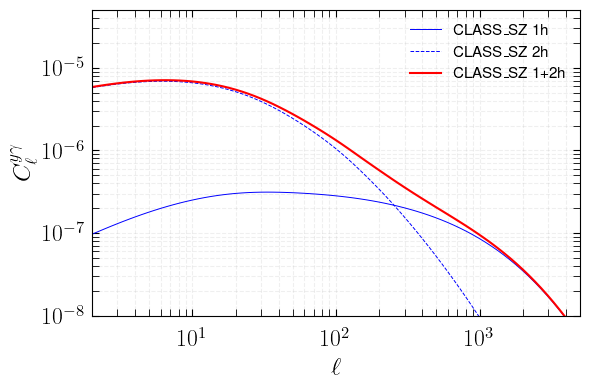

In [11]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(6,4))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r'$\ell$',size=title_size)
ax.set_ylabel(r'$C_\ell^{y\gamma}$',size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1e-8,5e-5)
ax.set_xlim(2.,5e3)
fac = ell*(ell+1.)/2./np.pi
ax.plot(ell,cl1h/fac,label='CLASS_SZ 1h',c='b',ls='-',lw=0.7)
ax.plot(ell,cl2h/fac,label='CLASS_SZ 2h',c='b',ls='--',lw=0.7)
ax.plot(ell,cl1h/fac+cl2h/fac,label='CLASS_SZ 1+2h',c='r')


ax.legend(loc=1,ncol = 1,frameon=False,fontsize=11)

fig.tight_layout()